In [1]:
# import librararies
import numpy as np
import pandas as pb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression 

In [2]:
in_f=pb.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/pima-indians-diabetes-2.csv")

In [3]:
in_f.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
in_f.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
in_f["skin"]=in_f["skin"].replace(to_replace=0,value=np.nan)
in_f["skin"]=in_f["skin"].astype(float)
median1=in_f["skin"].median()
in_f["skin"].replace(np.nan,median1,inplace=True)
in_f["test"]=in_f["test"].replace(to_replace=0,value=np.nan)
in_f["test"]=in_f["test"].astype(float)
median3=in_f["test"].median()
in_f["test"].replace(np.nan,median3,inplace=True)
in_f["mass"]=in_f["mass"].replace(to_replace=0,value=np.nan)
in_f["mass"]=in_f["mass"].astype(float)
median1=in_f["mass"].median()
in_f["mass"].replace(np.nan,median1,inplace=True)

In [6]:
in_f["Pres"]=in_f["Pres"].replace(to_replace=0,value=np.nan)
in_f["Pres"]=in_f["Pres"].astype(float)
median2=in_f["Pres"].median()
in_f["Pres"].replace(np.nan,median2,inplace=True)

In [7]:
in_f.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,29.0,125.0,32.3,0.232,54,1


In [8]:
vi=in_f.duplicated()
print(vi.sum())

0


<AxesSubplot:>

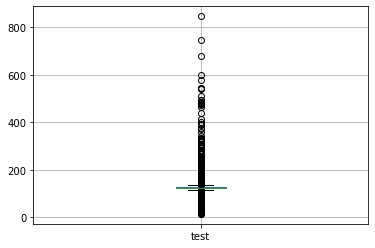

In [9]:
in_f.boxplot(column=["test"])

In [10]:
def remove_outlier (col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [11]:
low,upp=remove_outlier(in_f["test"])
in_f["test"]=np.where(in_f["test"]>upp,upp,in_f["test"])
in_f["test"]=np.where(in_f["test"]<low,low,in_f["test"])

<AxesSubplot:>

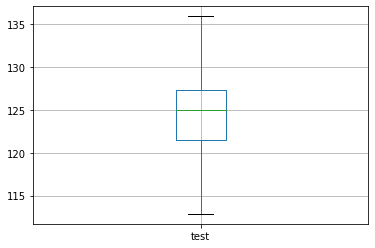

In [12]:
in_f.boxplot(column=["test"])

In [13]:
x=in_f.drop(["class"],axis=1)
y=in_f[["class"]]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [15]:
rg_mol=LogisticRegression()
rg_mol.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
rg_mol.score(x_train,y_train)

0.7653631284916201

In [17]:
rg_mol.score(x_test,y_test)

0.7792207792207793

In [18]:
predictions=rg_mol.predict(x_test)

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.56      0.65        85

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231



<AxesSubplot:>

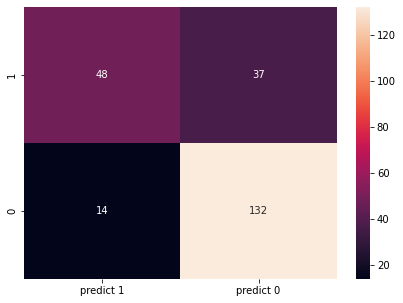

In [20]:
mv=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
mf_mv=pb.DataFrame(mv,index=[i for i in["1","0"]],
                 columns=[i for i in["predict 1","predict 0"]] )
plt.figure(figsize=(7,5))
sns.heatmap(mf_mv,annot=True,fmt="g")

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

In [22]:
lf=SVC(kernel="linear",C=2,gamma="auto")
lf.fit(x_train,y_train)
lf.score(x_train,y_train)


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7653631284916201

In [23]:
lf.score(x_test,y_test)

0.7748917748917749

In [24]:
lf=SVC(kernel="linear",C=2,gamma="auto")
lf.fit(x_train,y_train)
lf.score(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7653631284916201

In [25]:
lf.score(x_test,y_test)

0.7748917748917749

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier( n_neighbors=5,p=1)

In [28]:
knn.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(p=1)

In [29]:
knn.score(x_train,y_train)

0.8230912476722533

In [30]:
knn.score(x_test,y_test)

0.7705627705627706

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
trr=DecisionTreeClassifier(splitter='best',criterion='entropy',min_samples_split=6,
    min_samples_leaf=2,max_depth=4)
trr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=6)

In [33]:
trr.score(x_train,y_train)

0.7821229050279329

In [34]:
trr.score(x_test,y_test)


0.7835497835497836